# UC Irvine - Energy Efficiency EDA

This dataset contain measurements of building characteristics and their corresponding heating and cooling loads. Understanding these relationships is critical for designing energy-efficient buildings, reducing costs, and minimizing environmental impact.

Data is sourced from UC Irvine Machine Learning Repository.

---

### Import data and setup packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display

""" COPIED FROM UC IRVINE TO FETCH DATA """
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# Data 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# Metadata 
display(energy_efficiency.metadata) 

{'uci_id': 242,
 'name': 'Energy Efficiency',
 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency',
 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv',
 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.',
 'area': 'Computer Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 768,
 'num_features': 8,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Y1', 'Y2'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Mon Feb 26 2024',
 'dataset_doi': '10.24432/C51307',
 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'],
 'intro_paper': {'ID': 379,
  'type': 'NATIVE',
  'title': 'Accurate quantitative estimation of energy performance of residential buildings us

---

### Dataset Overview

In [2]:
# Join X and y data to give us the ability to find the relationships between X and y.
df = pd.concat([X, y], axis = 1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
# Shape and first 5 rows.
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Info on the data: missing values, and data types.
print("Check info and missing values: ")
df.info()
print("Second confirmation on null values: ")
df.isnull().sum()

Check info and missing values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
Second confirmation on null values: 


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

---

### Data Cleaning / Preprocessing

In [5]:
# Variable information check for so I can rename it here. Also, another confirmation here that there are no missing values.
# Noting that since the variable names in the data are Xn and Yn as follows, this may cause confusion down the line so I'm using the descriptions as the column names.
display(energy_efficiency.variables) 

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


In [6]:
# Rename features using variables' descriptions for ease of use and better context.
rename_map = dict(zip(
    energy_efficiency.variables['name'],
    [name.replace(" ", "_") for name in energy_efficiency.variables['description']]
))

df_renamed = df.rename(columns=rename_map)
df_renamed


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


---

### Descriptive Statistics

In [7]:
# Summary statistics of the data
df_renamed.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


---

In [20]:
# Grouped Summaries

no_load = [x for x in df_renamed if x not in ['Heating_Load', 'Cooling_Load']]
for i in no_load:
    print(f"Grouping by {i}")
    display(df_renamed.groupby(i)[['Heating_Load', 'Cooling_Load']].agg(['min', 'mean','max']))

Grouping by Relative_Compactness


Heating_Load                   Cooling_Load             \
                              min       mean    max          min       mean   
Relative_Compactness                                                          
0.62                         8.45  14.283281  17.26        12.04  15.244063   
0.64                        10.54  16.615313  19.52        16.67  20.227187   
0.66                         7.10  12.816719  15.34        12.14  15.869844   
0.69                         6.77  12.388906  14.75        11.73  15.242188   
0.71                         6.37  12.040156  14.71        11.27  15.035469   
0.74                         6.01  11.886719  14.61        10.90  14.809844   
0.76                        23.93  35.664219  40.78        29.40  36.407187   
0.79                        28.52  38.607969  43.10        30.93  40.239375   
0.82                        15.98  25.555312  30.00        21.16  28.028125   
0.86                        18.31  28.552656  32.75        21.97  30.912031   
0.90                        19.68  31.628906  37.24        25.16  33.820781   
0.98                        15.55  27.646250  32.85        21.33  29.217031   

                             
                        max  
Relative_Compactness         
0.62                  17.38  
0.64                  22.73  
0.66                  18.36  
0.69                  17.39  
0.71                  17.74  
0.74                  17.32  
0.76                  40.85  
0.79                  48.03  
0.82                  33.84  
0.86                  36.86  
0.90                  40.99  
0.98                  34.01

Grouping by Surface_Area


Heating_Load                   Cooling_Load                  
                      min       mean    max          min       mean    max
Surface_Area                                                              
514.5               15.55  27.646250  32.85        21.33  29.217031  34.01
563.5               19.68  31.628906  37.24        25.16  33.820781  40.99
588.0               18.31  28.552656  32.75        21.97  30.912031  36.86
612.5               15.98  25.555312  30.00        21.16  28.028125  33.84
637.0               28.52  38.607969  43.10        30.93  40.239375  48.03
661.5               23.93  35.664219  40.78        29.40  36.407187  40.85
686.0                6.01  11.886719  14.61        10.90  14.809844  17.32
710.5                6.37  12.040156  14.71        11.27  15.035469  17.74
735.0                6.77  12.388906  14.75        11.73  15.242188  17.39
759.5                7.10  12.816719  15.34        12.14  15.869844  18.36
784.0               10.54  16.615313  19.52        16.67  20.227187  22.73
808.5                8.45  14.283281  17.26        12.04  15.244063  17.38

Grouping by Wall_Area


Heating_Load                   Cooling_Load                  
                   min       mean    max          min       mean    max
Wall_Area                                                              
245.0             6.01  11.886719  14.61        10.90  14.809844  17.32
269.5             6.37  12.040156  14.71        11.27  15.035469  17.74
294.0             6.77  22.862604  32.85        11.73  25.123750  36.86
318.5             7.10  23.333646  37.24        12.14  25.906250  40.99
343.0            10.54  27.611641  43.10        16.67  30.233281  48.03
367.5             8.45  14.283281  17.26        12.04  15.244063  17.38
416.5            23.93  35.664219  40.78        29.40  36.407187  40.85

Grouping by Roof_Area


Heating_Load                   Cooling_Load                  
                   min       mean    max          min       mean    max
Roof_Area                                                              
110.25           15.55  27.646250  32.85        21.33  29.217031  34.01
122.50           19.68  33.646563  40.78        25.16  35.113984  40.99
147.00           15.98  30.905312  43.10        21.16  33.059844  48.03
220.50            6.01  13.338516  19.52        10.90  16.071432  22.73

Grouping by Overall_Height


Heating_Load                   Cooling_Load                  
                        min       mean    max          min       mean    max
Overall_Height                                                              
3.5                    6.01  13.338516  19.52        10.90  16.071432  22.73
7.0                   15.55  31.275885  43.10        21.16  33.104089  48.03

Grouping by Orientation


Heating_Load                   Cooling_Load                  
                     min       mean    max          min       mean    max
Orientation                                                              
2                   6.07  22.312865  42.77        10.90  24.604531  46.44
3                   6.05  22.380677  43.10        11.19  24.312552  47.59
4                   6.01  22.259896  42.74        10.94  24.480313  47.01
5                   6.04  22.275365  42.96        11.17  24.953646  48.03

Grouping by Glazing_Area


Heating_Load                   Cooling_Load                  
                      min       mean    max          min       mean    max
Glazing_Area                                                              
0.00                 6.01  14.286458  29.90        10.90  19.706250  39.44
0.10                10.07  20.357167  37.26        13.20  22.935542  43.33
0.25                11.64  22.756917  40.19        13.79  24.892625  45.97
0.40                12.42  25.411667  43.10        14.58  26.911417  48.03

Grouping by Glazing_Area_Distribution


Heating_Load                   Cooling_Load  \
                                   min       mean    max          min   
Glazing_Area_Distribution                                               
0                                 6.01  14.286458  29.90        10.90   
1                                10.36  23.026111  42.62        13.43   
2                                10.32  22.934444  43.10        13.20   
3                                10.34  22.681458  42.49        13.36   
4                                10.07  22.886667  42.96        13.20   
5                                10.34  22.680903  42.11        13.44   

                                             
                                mean    max  
Glazing_Area_Distribution                    
0                          19.706250  39.44  
1                          25.179514  46.94  
2                          24.996875  48.03  
3                          24.659444  46.44  
4                          25.015139  47.59  
5                          24.715000  47.01

### Univariate Analysis

##### Distributions

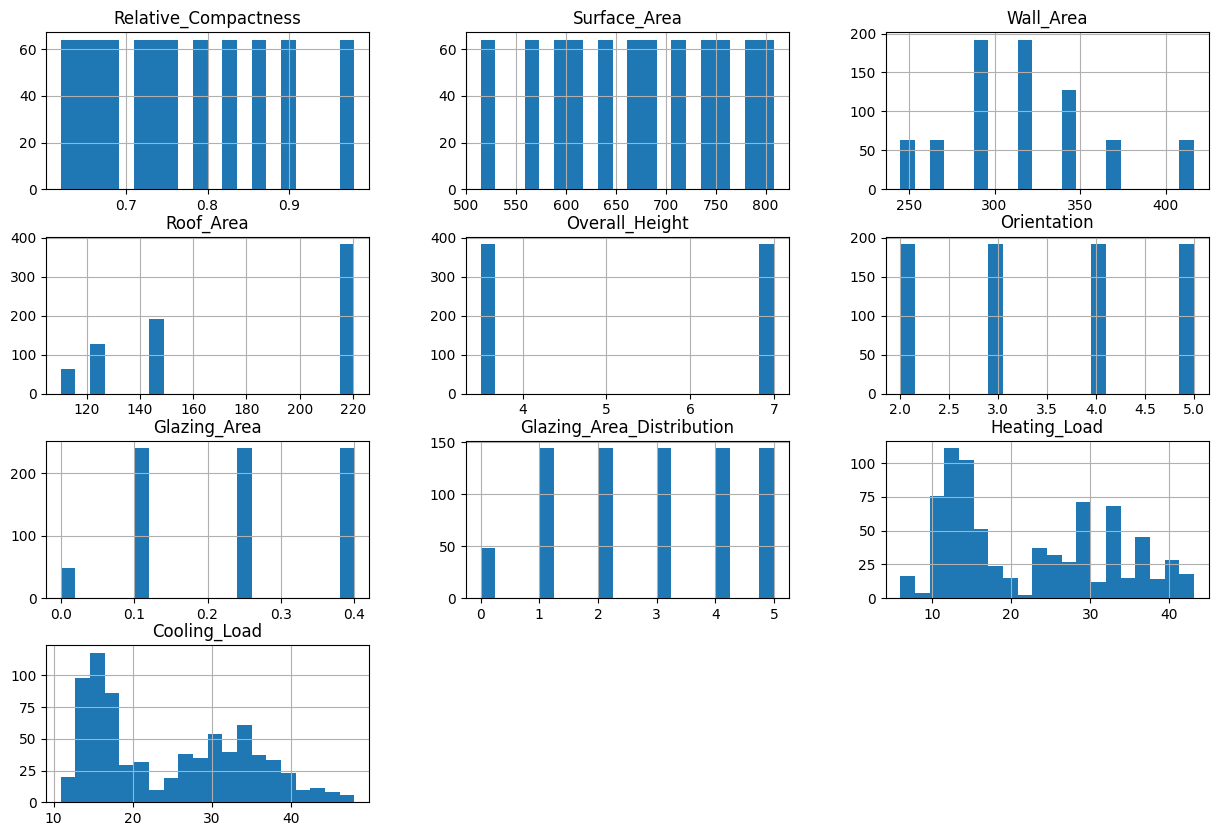

In [67]:
# Show the distributions of each feature
df_renamed.hist(bins = 20, figsize = (15,10))
plt.show()

Histogram Findings:
1. The histograms show right-skewed distributions for both Heating Load and Cooling Load. Most buildings in the sample have low heating/cooling requirements, with fewer buildings requiring much higher loads.

2. I am assuming here that Heating Load and Cooling Load might be positively correlated, which is logical since factors such as building compactness, glazing area, and insulation (even though not explicitly in the dataset) influence both loads in similar ways.

---

##### Boxplots for outlier checking

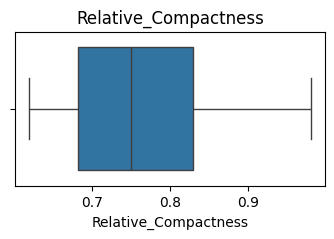

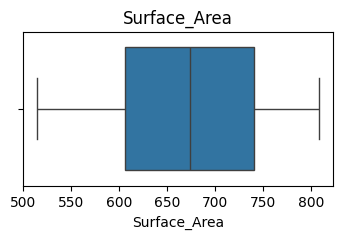

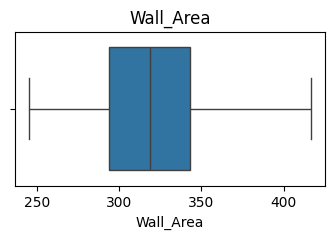

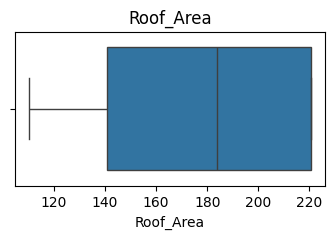

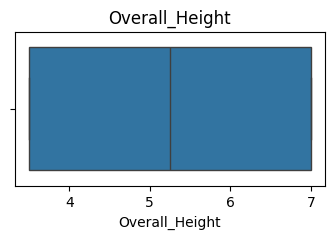

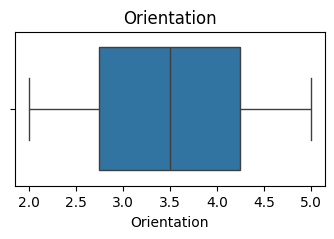

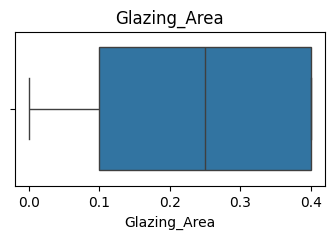

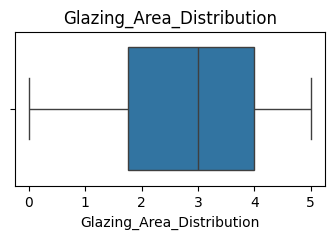

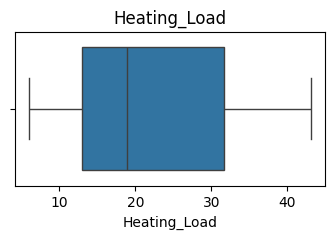

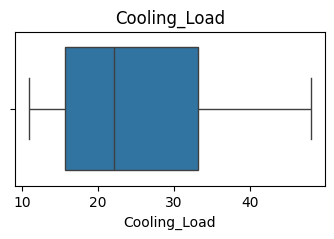

In [76]:
for col in df_renamed.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot( x = df_renamed[col])
    plt.title(col)
    plt.show()

No outliers found for any of the variables.


---

### Bivariate Analysis

##### Correlations

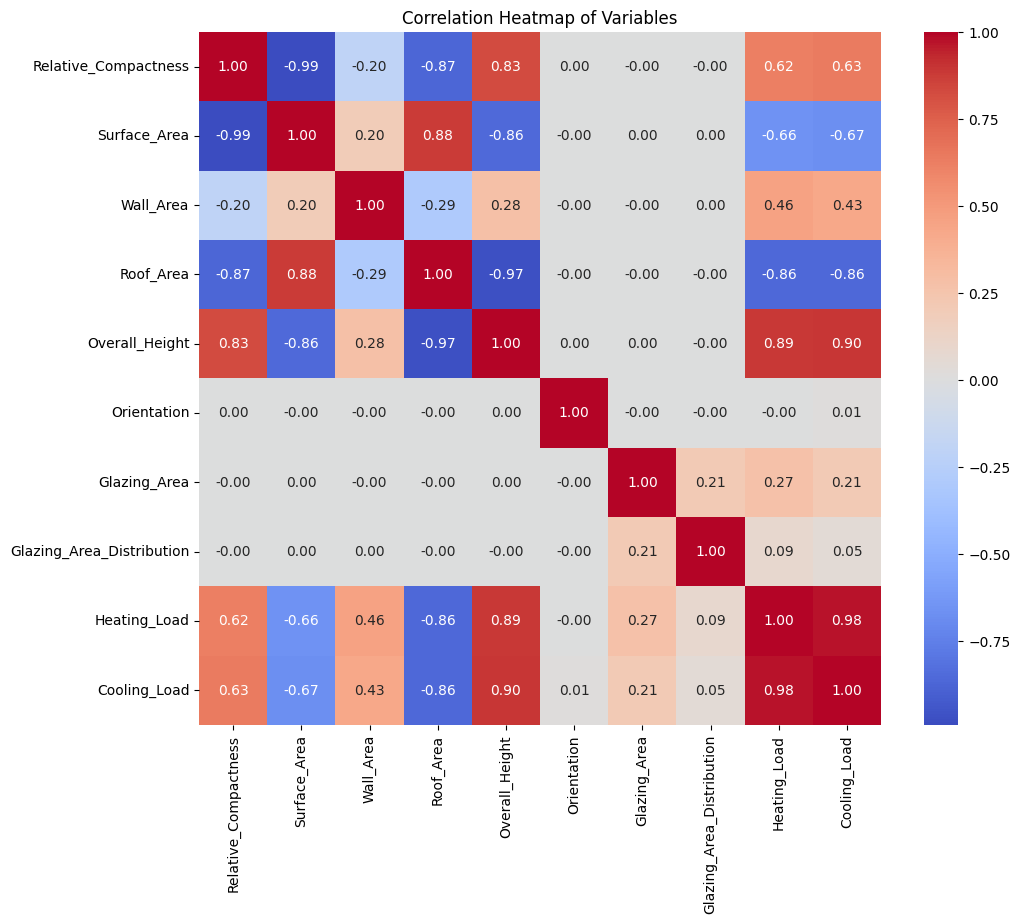

In [ ]:
# Correlation Heatmap to show the relationship between the features and target variables.
plt.figure(figsize = (11,9))
sns.heatmap(df_renamed.corr(),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f'
            )
plt.title('Correlation Heatmap of Variables')
plt.show()

Correlation Findings:
1. The highest positive correlation for both Heating Load and Cooling Load is with Overall Height (0.89-0.9), which makes sense since taller structures have more volume and surface area to heat or cool.

2. There is a strong negative relationship between Surface Area and Relative Compactness (-0.99). Suggesting that more compact structures have less exposed surface area, reducing heat transfer and, in turn, lowering energy consumption for heating and cooling.

3. Roof Area and Overall Height show a negative relationship (-0.97). This could be due to taller structures often having steeper roof pitches, which might alter roof size. This is also supported by the relationship between Roof Area and Surface Area, as steeper roof designs can increase both. However, the high negative correlation between Roof Area and Relative Compactness suggests that architectural trade-offs may influence these relationships.

---

##### Pairplot

['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


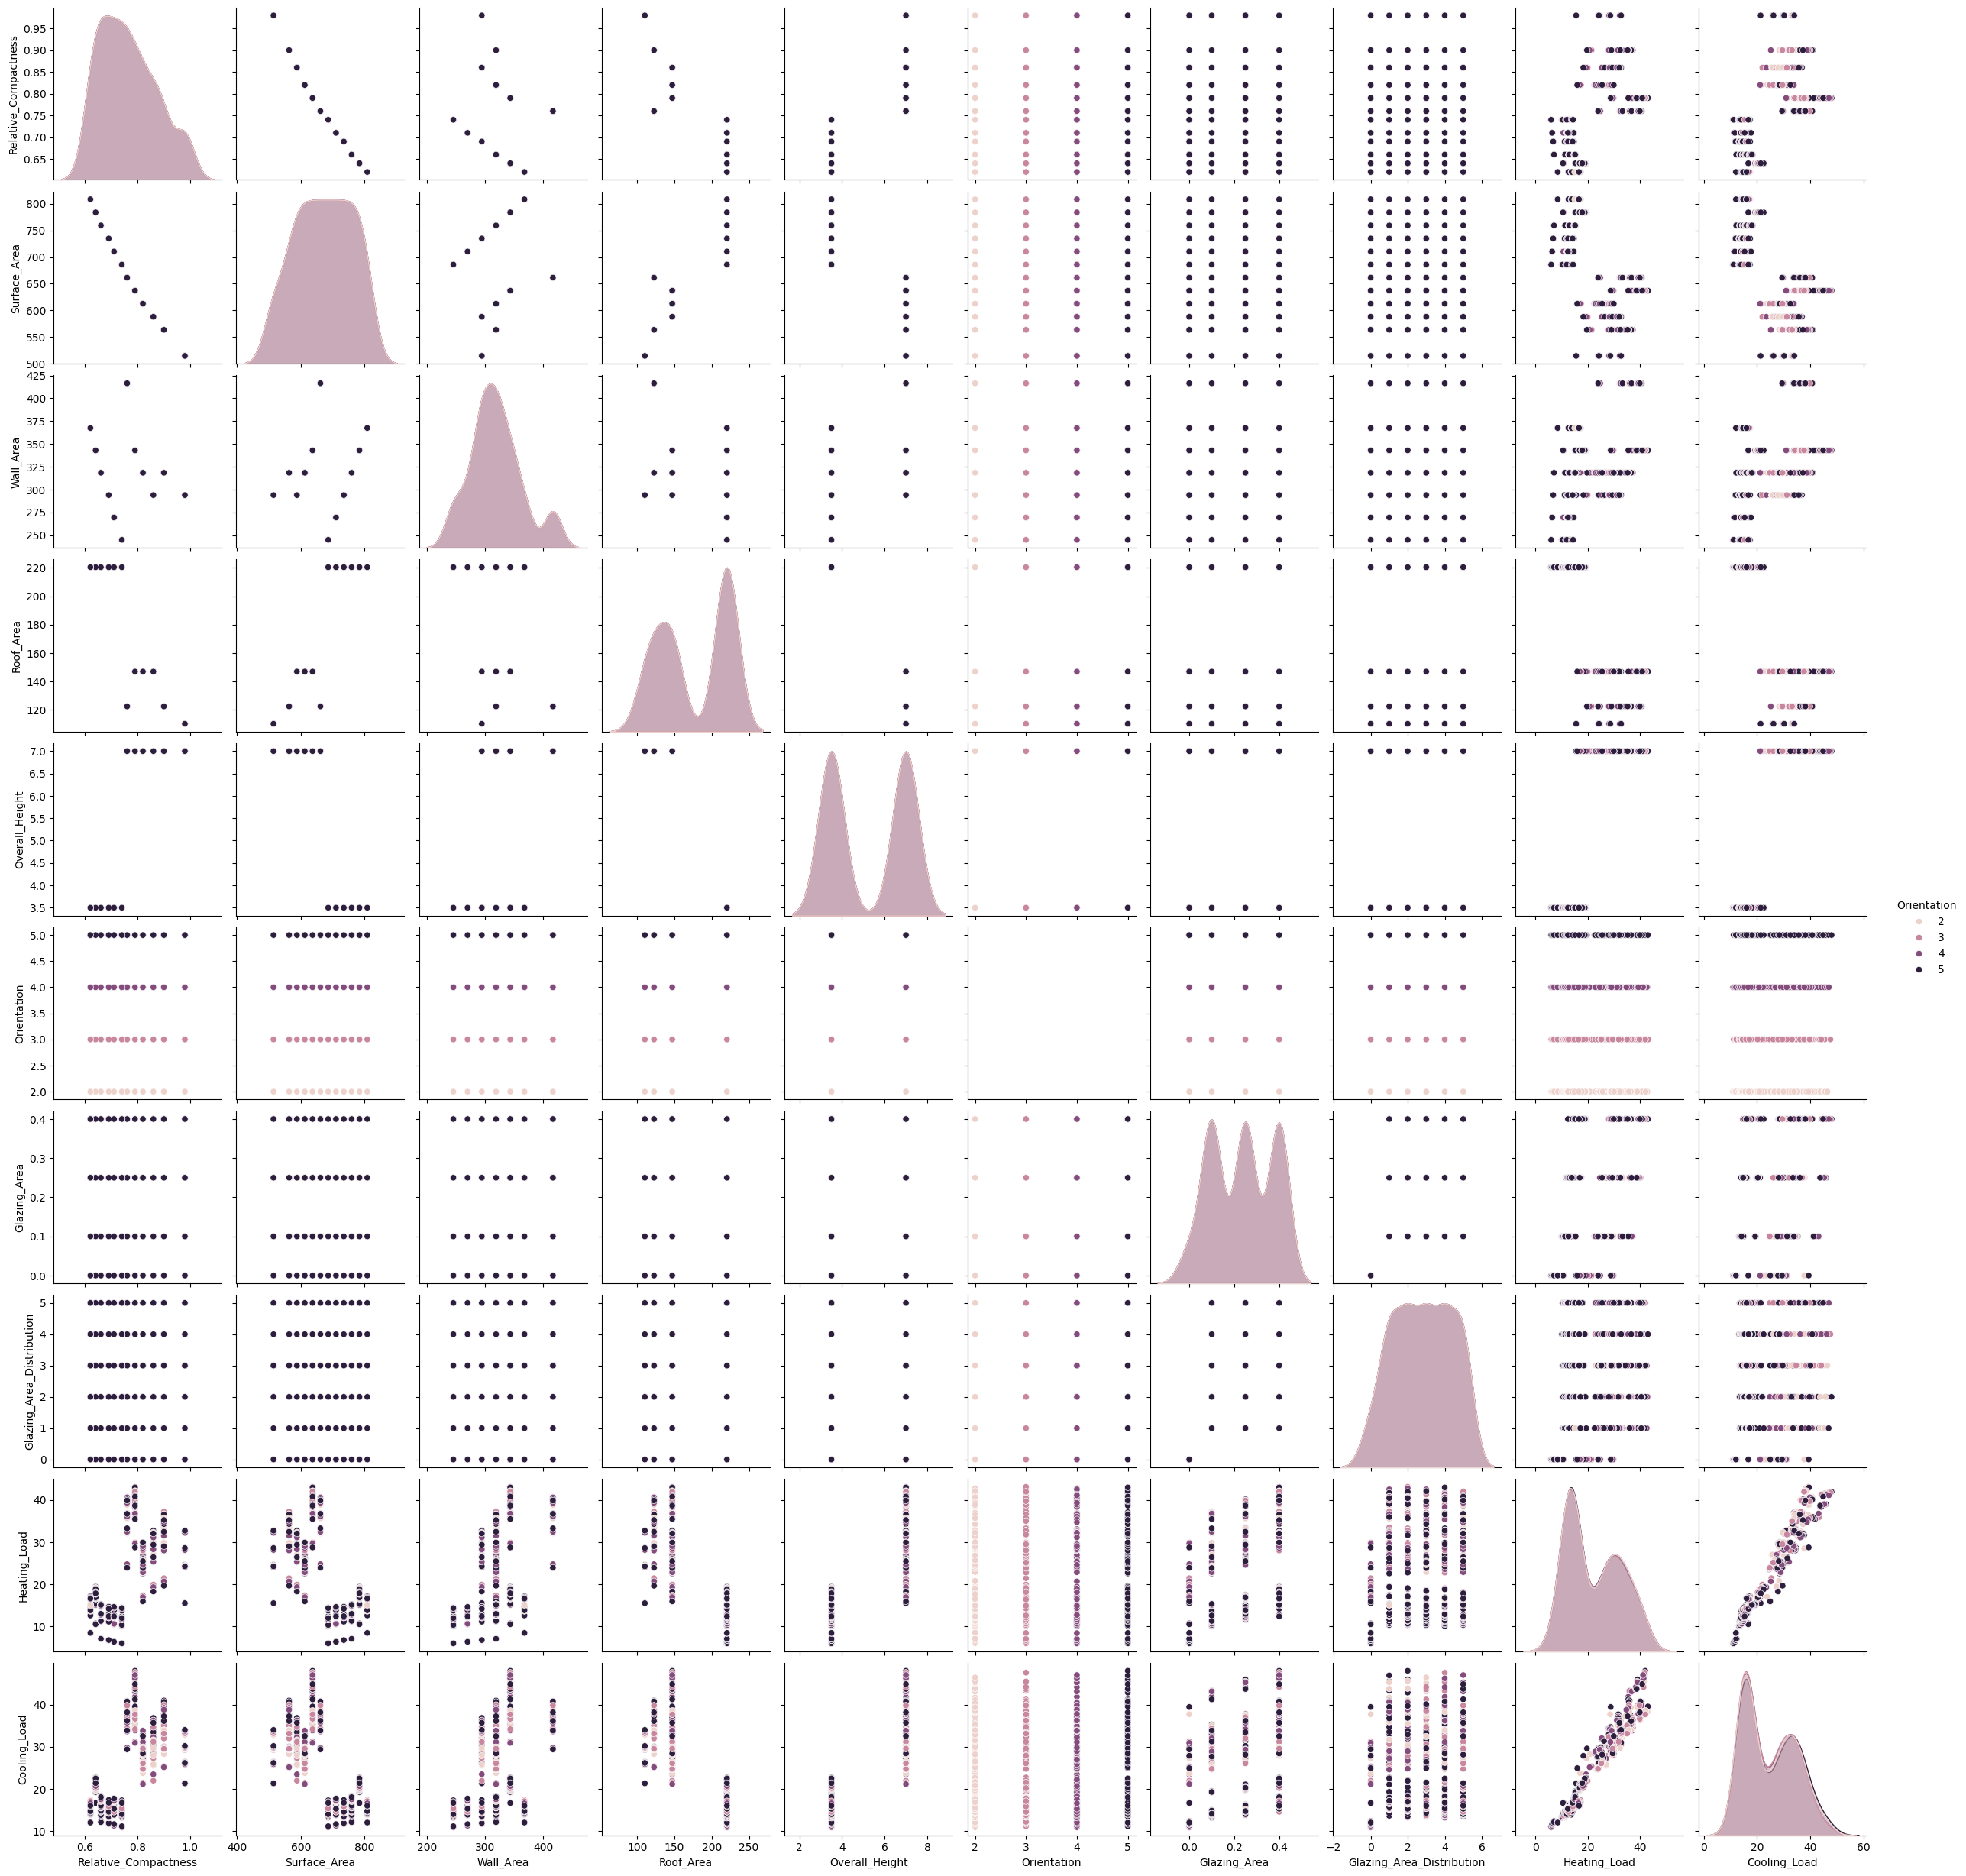

In [77]:
# Show pairwise relationships between the variables
vars = [col for col in df_renamed.columns]
print(vars)
sns.pairplot(df_renamed,
             vars = vars,
             hue = 'Orientation'
             )

plt.show()

Findings:
1. Adding Heating Load and Cooling Load to the pairplots reveals that the relationship between the target variables (y) and the predictors (X) tends to be linear.
2. The data points are more clustered at the lower end of the predictor values. This suggests that, while some variation exists when comparing predictors with each other, certain design choices (or trade-offs) limit extreme values in the dataset.

---

##### Scatterplot

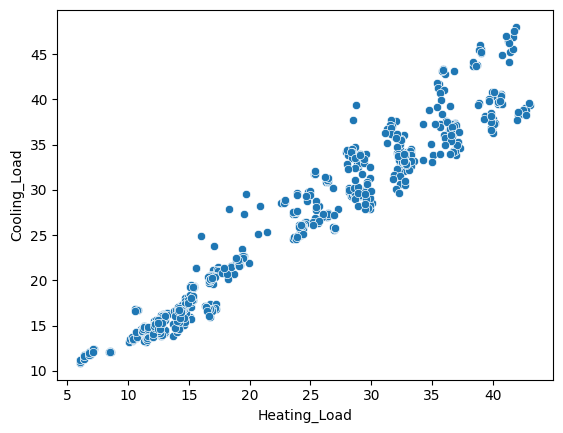

In [78]:
# Show scatterplot to show the relationship between Heating Load and Cooling Load
sns.scatterplot(x = 'Heating_Load', y = 'Cooling_Load',
                data = df_renamed)
plt.show()

Histogram shows that the tail extends towards higher values with most data points clustered at the lower values which suggest that there are more buildings in the sample that have low heating/cooling requirements. We can also note here that heating load and cooling load is positively correlated which makes sense because factors, as I've mentioned previously, like compactness, glazing, area, and even insulation, despite it not being part of the features, tend have an effect to both loads.

---

### Key Insights, Findings, and Assumptions:

1. Positive relationship between cooling and heating load (0.98):
    - Cooling and heating load are strongly positively correlated, suggesting that factors influencing one generally affect the other in a similar way. Among all features, overall height appears to have the largest impact on both loads, which aligns with the physical intuition that larger volumes require more energy to heat or cool.

2. Design specifications and additional features:
    - Feature distribution skewness:
        - Many input features show left-skewed distributions, indicating that most buildings in the dataset have lower design specifications (e.g., smaller surface area, less glazing). This design choice could reflect cost-saving measures, efficiency 'optimization', or specific construction constraints.

    - Design trade-offs and potential missing factors:
        - The tendency towards lower design specs—confirmed by pairplot patterns—suggests deliberate trade-offs between building features and energy load. However, the dataset lacks information on additional factors like insulation quality, ventilation systems, and building materials, which could provide more context for these design choices and will allow us to assess further why the loads are higher.

3. Next analytical step: Regression modeling
    - A regression analysis would help quantify the influence of each feature on heating and cooling load, test the above assumptions, and determine the extent to which overall height dominates the load variation. Doing the regression analysis will also either confirm or challenge your current hypothesis

---